# Data Visualization and Analysis of People's behavior in Fatal Accident 

In notebook2, we complied data and selected features according to logistic regression in notebook 1. In this notebook, in order to get a sense of what value are contained in the features we selected, and how these features and predicted variable, fatal accidents distriuted, we decided to visualize all the accidents in recent 10 years on map, and plot the distribution of features.

In [2]:
# -*- coding: utf-8 -*- 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import *
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from dbfread import DBF
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# load data we saved in notebook2
accidents=pd.read_hdf('results/accidents.h5', 'accidents')
vehicles=pd.read_hdf('results/vehicles.h5', 'vehicles')
person = pd.read_hdf('results/person.h5', 'person')

## Simple Data Exploration

### Distribution of US Fatal Accidents by Location

In [4]:
def fatal_accident_location(data):
    f, ax = plt.subplots(1,1, figsize=(16,9))
    m = Basemap(projection='lcc', resolution='l', llcrnrlon=-119, urcrnrlon=-64, llcrnrlat=22, urcrnrlat=49,
            lat_1=33, lat_2=45, lon_0=-95,area_thresh=10000)
    lat = data.LATITUDE.values
    lon = data.LONGITUD.values
    # Draw map background
    m.fillcontinents(color='white', lake_color='#eeeeee')
    m.drawstates(color='lightgray')
    m.drawcoastlines(color='lightgray')
    m.drawcountries(color='lightgray')
    m.drawmapboundary(color='gray', fill_color='#eeeeee')
    # Plot accident location
    m.scatter(lon,lat,latlon=True, s=1, marker='o', alpha=0.2, zorder=2)
    plt.title('fatal_accident_location')

In [5]:
accidents.head()

,YEAR,CASE_NUM,STATE,NUM_VEHICLE,FATALS,MONTH,DAY_WEEK,HOUR,HIGHWAY,LATITUDE,LONGITUD,COLLISION_TYPE,LIGHT_CONDITION,WEATHER,CRASH_FACTOR,DRUNK_DRIVE
200710001,2007,10001,1,1.0,1.0,January,Tuesday,23.0,Off,33.455839,-87.017928,Not Collision,Dark,Clear,0.0,0.0
200710002,2007,10002,1,3.0,2.0,January,Tuesday,13.0,Off,34.160597,-85.678075,"Sideswipe, Same Direction",Daylight,Clear,0.0,0.0
200710003,2007,10003,1,2.0,1.0,January,Sunday,12.0,Off,33.975717,-86.496347,"Sideswipe, Unknown Direction",Daylight,Clear,0.0,0.0
200710004,2007,10004,1,2.0,1.0,January,Monday,15.0,On,33.853258,-85.915622,Angle,Daylight,Clear,0.0,0.0
200710005,2007,10005,1,2.0,1.0,January,Saturday,19.0,Off,32.488833,-86.408936,"Sideswipe, Same Direction",Dark,Clear,0.0,0.0


The accidents dataframe contains all fatal accident case happened from 2007-2016, we will use the "LATITUDE" and "LONGITUD" feature in accident to visualize distribution of fatal accidents over 10 year in the U.S.

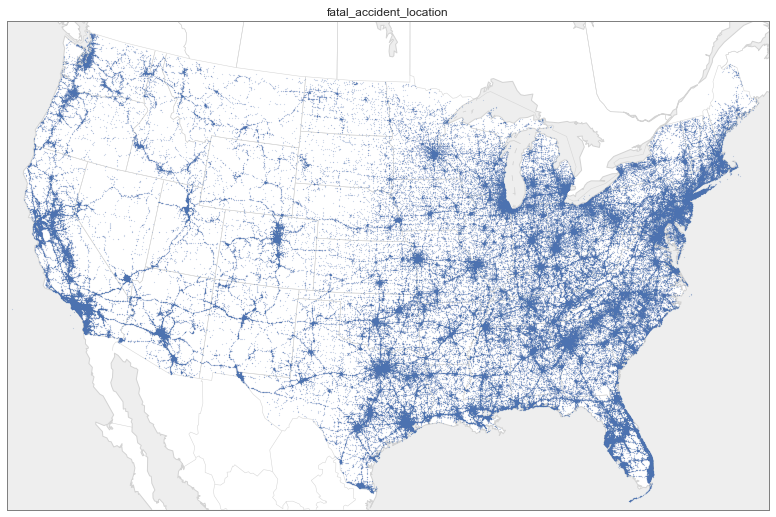

In [6]:
fatal_accident_location(accidents)

Observed from the graph above, we can see that east coast have more fatal accidents than west coast and the central of U.S, and that being said, the high poplulation density is it, the more fatal accidents happened. <br/>
We have another interesting observation, the distribition of fatal accidents looks simmilar compared to the picture below, the U.S. highway map. The major highway in the U.S. are highlighted in the graph above, indicating a lot of fatal accidents happened on major highway in the U.S.

![U.S. Highway Map](fig/us_highway_map.jpg)

source: [Major Tourist Attractions Maps](http://www.1830ndaytona.info/driving-map-of-united-states/driving-map-of-united-states-6-maps-update-975660-map-usa-interstate-highways-united-states/)

## 

In [7]:
# process data before
# Grop accidents by Year, Month, Day of the week, and Hour
year_acci=accidents[['YEAR','CASE_NUM']].groupby('YEAR').count()
month_acci=accidents[['MONTH','CASE_NUM']].groupby('MONTH').count()
day_acci=accidents[['DAY_WEEK','CASE_NUM']].groupby('DAY_WEEK').count()
hour_acci=accidents[['HOUR','CASE_NUM']].groupby('HOUR').count()
# create new indexes
hour_acci=hour_acci.drop(hour_acci.index[-1])
hour_acci.iloc[0]=hour_acci.iloc[0]+hour_acci.iloc[-1]
hour_acci=hour_acci.drop(hour_acci.index[-1])
day_acci.index = pd.CategoricalIndex(day_acci.index, 
                               categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday', 'Sunday'], 
                               sorted=True)
day_acci = day_acci.sort_index()
month_acci.index=pd.CategoricalIndex(month_acci.index, 
                               categories=['January', 'February', 'March', 'April','May','June', 'July','August','September','October','November','December'], 
                               sorted=True)
month_acci=month_acci.sort_index()

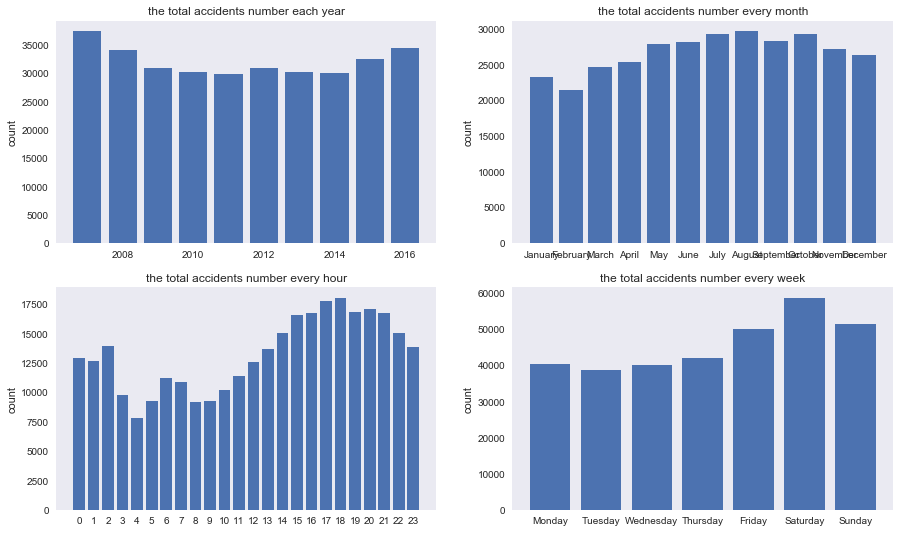

In [8]:
f1,axarr = plt.subplots(2,2)
f1.set_figwidth(15)
f1.set_figheight(9)

axarr[0,0].set_ylabel("count")
axarr[0,0].set_title("the total accidents number each year")
axarr[0,0].bar(year_acci.index,year_acci['CASE_NUM'])

objects1=np.array(month_acci.index)
x1=np.arange(len(objects1))
axarr[0,1].set_ylabel("count")
axarr[0,1].set_title("the total accidents number every month")
axarr[0,1].bar(x1,month_acci['CASE_NUM'])
axarr[0,1].set_xticks(x1)
axarr[0,1].set_xticklabels(objects1)

axarr[1,0].set_ylabel("count")
axarr[1,0].set_title("the total accidents number every hour")
axarr[1,0].bar(hour_acci.index,hour_acci['CASE_NUM'])
axarr[1,0].set_xticks(np.arange(0,24))

objects2=np.array(day_acci.index)
x2=np.arange(len(objects2))
axarr[1,1].set_ylabel("count")
axarr[1,1].set_title("the total accidents number every week")
axarr[1,1].bar(x2,day_acci['CASE_NUM'])
axarr[1,1].set_xticks(x2)
axarr[1,1].set_xticklabels(objects2)
f1.savefig("fig/time_relate_count.png")

Fatal accidents declined from 2007 to 2014, However, recently, fetal accients increase since 2015, and in 2016, the number of fatal accient was the highest among recent 8 years. <br/>

Secondly, we found that in July and August have the highest number of fatal accidents, and January and February have the loswet number of fatal accidents. One logical explaination is, when the weather is warm, people tend to go outdoor more often, and maybe people tend to be more imposive in summer, so warmmer monthes tends to have more fatal accidents than cooler monthes, when people are less likely to go out.<br/>

The distribution of fatal accidents by hour have a very interesting pattern. From 8 a.m to 6 p.m, as time passes by, more fatal accients happene. There is a downward trend of fatal accients from 6 p.m to 3 am. However, eventough fatal accidents declines since 6 pm, the number of fatal accidents happened in 6pm-12.am are still high compare to other time interval. <br/>

From the last graph, we can see as weekend approaches, the number of fatal accidents increase, and the highest number of fatal accidents occurs at Saturday and Sunday, which are signifiantly higher than number of fatal accidents happen during weekdays. 

## Fatal Accident v.s. Speeding 

In [16]:
# merge accidents and person dataframe, so that we can drivers' personal information 
fatal_crashs = pd.merge(vehicles, person, left_index=True, right_index=True, how='outer',on=('STATE', 'YEAR','CASE_NUM'))
fatal_crashs.head()

,STATE,YEAR,CASE_NUM,SPEED,ROLLOVER,FIRE,SPEEDING,BODY_TYP,DEATHS,DRINKING_INDICATOR,AGE,SEX,RACE
2007100001,10,2007,100001,99.0,0.0,0.0,NaN,Sedan,1.0,0.0,16.0,1.0,1.0
2007100002,10,2007,100002,50.0,0.0,0.0,NaN,Sedan,0.0,0.0,27.0,2.0,78.0
2007100002,10,2007,100002,50.0,0.0,0.0,NaN,Sedan,0.0,0.0,42.0,1.0,0.0
2007100002,10,2007,100002,50.0,0.0,0.0,NaN,Sedan,0.0,0.0,62.0,1.0,0.0
2007100002,10,2007,100002,50.0,0.0,0.0,NaN,Truck,0.0,0.0,27.0,2.0,78.0


In [17]:
""" since dataset contains not only vehicles but also other transportations such as trains, 
we exclueded trains by limiting the speed to 200 (usually cars have 180 mph limit), 
and also since the data before 2009 donot contain the information about speed and speeding, 
so we only use data which comes after 2009."""
crashs_since2009=fatal_crashs.loc[(fatal_crashs['YEAR'] >= 2009)&(fatal_crashs['SPEED'] <= 200)]
crashs_since2009['SPEEDING_INDICATOR']=crashs_since2009['SPEEDING'].where(crashs_since2009['SPEEDING'] <= 1, 1)

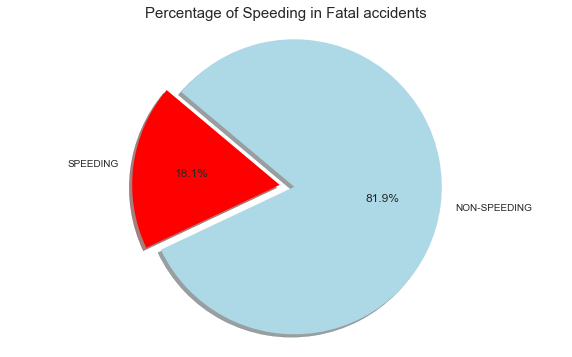

In [18]:
labels = 'SPEEDING','NON-SPEEDING'
colors = [ 'red','lightblue']
explode = (0.1, 0)  # explode 1st slice

speeding_percetage = [crashs_since2009.query('SPEEDING_INDICATOR == 1')['CASE_NUM'].count()/crashs_since2009['CASE_NUM'].count(), 
                     crashs_since2009.query('SPEEDING_INDICATOR == 0')['CASE_NUM'].count()/crashs_since2009['CASE_NUM'].count()]
# plot
plt.pie(speeding_percetage, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of Speeding in Fatal accidents",size =15)
plt.savefig("fig/percentage_of_speeding")
plt.show()

We found that in all Fatal accidents, about 20.0% of the driver exceed speed limit and speeding related activity, indicating that speeding is an important factor causing fata accidents. Next we want to explore that which group of people are most likely to engage in speeding-related activity.

[(0, 100)]

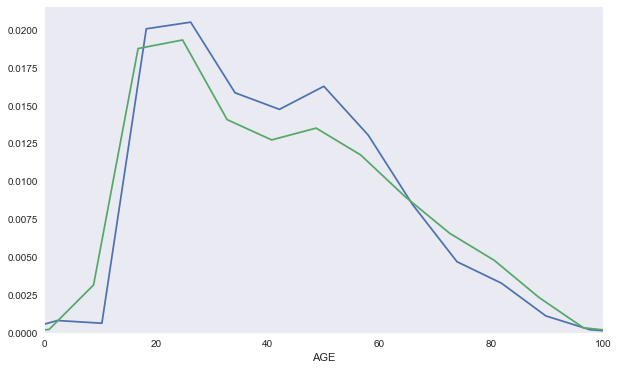

In [34]:
crashs_since2009['SPEEDING_INDICATOR']=crashs_since2009['SPEEDING'].where(crashs_since2009['SPEEDING'] == 1, 1)
male_crashs=crashs_since2009.loc[(crashs_since2009['SEX'] == 1)]
female_crashs=crashs_since2009.loc[(crashs_since2009['SEX'] == 2)]
f1=sns.distplot(male_crashs['AGE'],bins=5,hist=False)
f2=sns.distplot(female_crashs['AGE'],bins=5,hist=False)
f1.set(xlim=(0, 100))